In [1]:
import pygmt

In [2]:
# ==== Specify input files ====
speed_file = 'ICE_G0240_0000_v_EPSG4326.nc'
glacier_outline = 'glims_iceland_glacier_outlines.gmt'

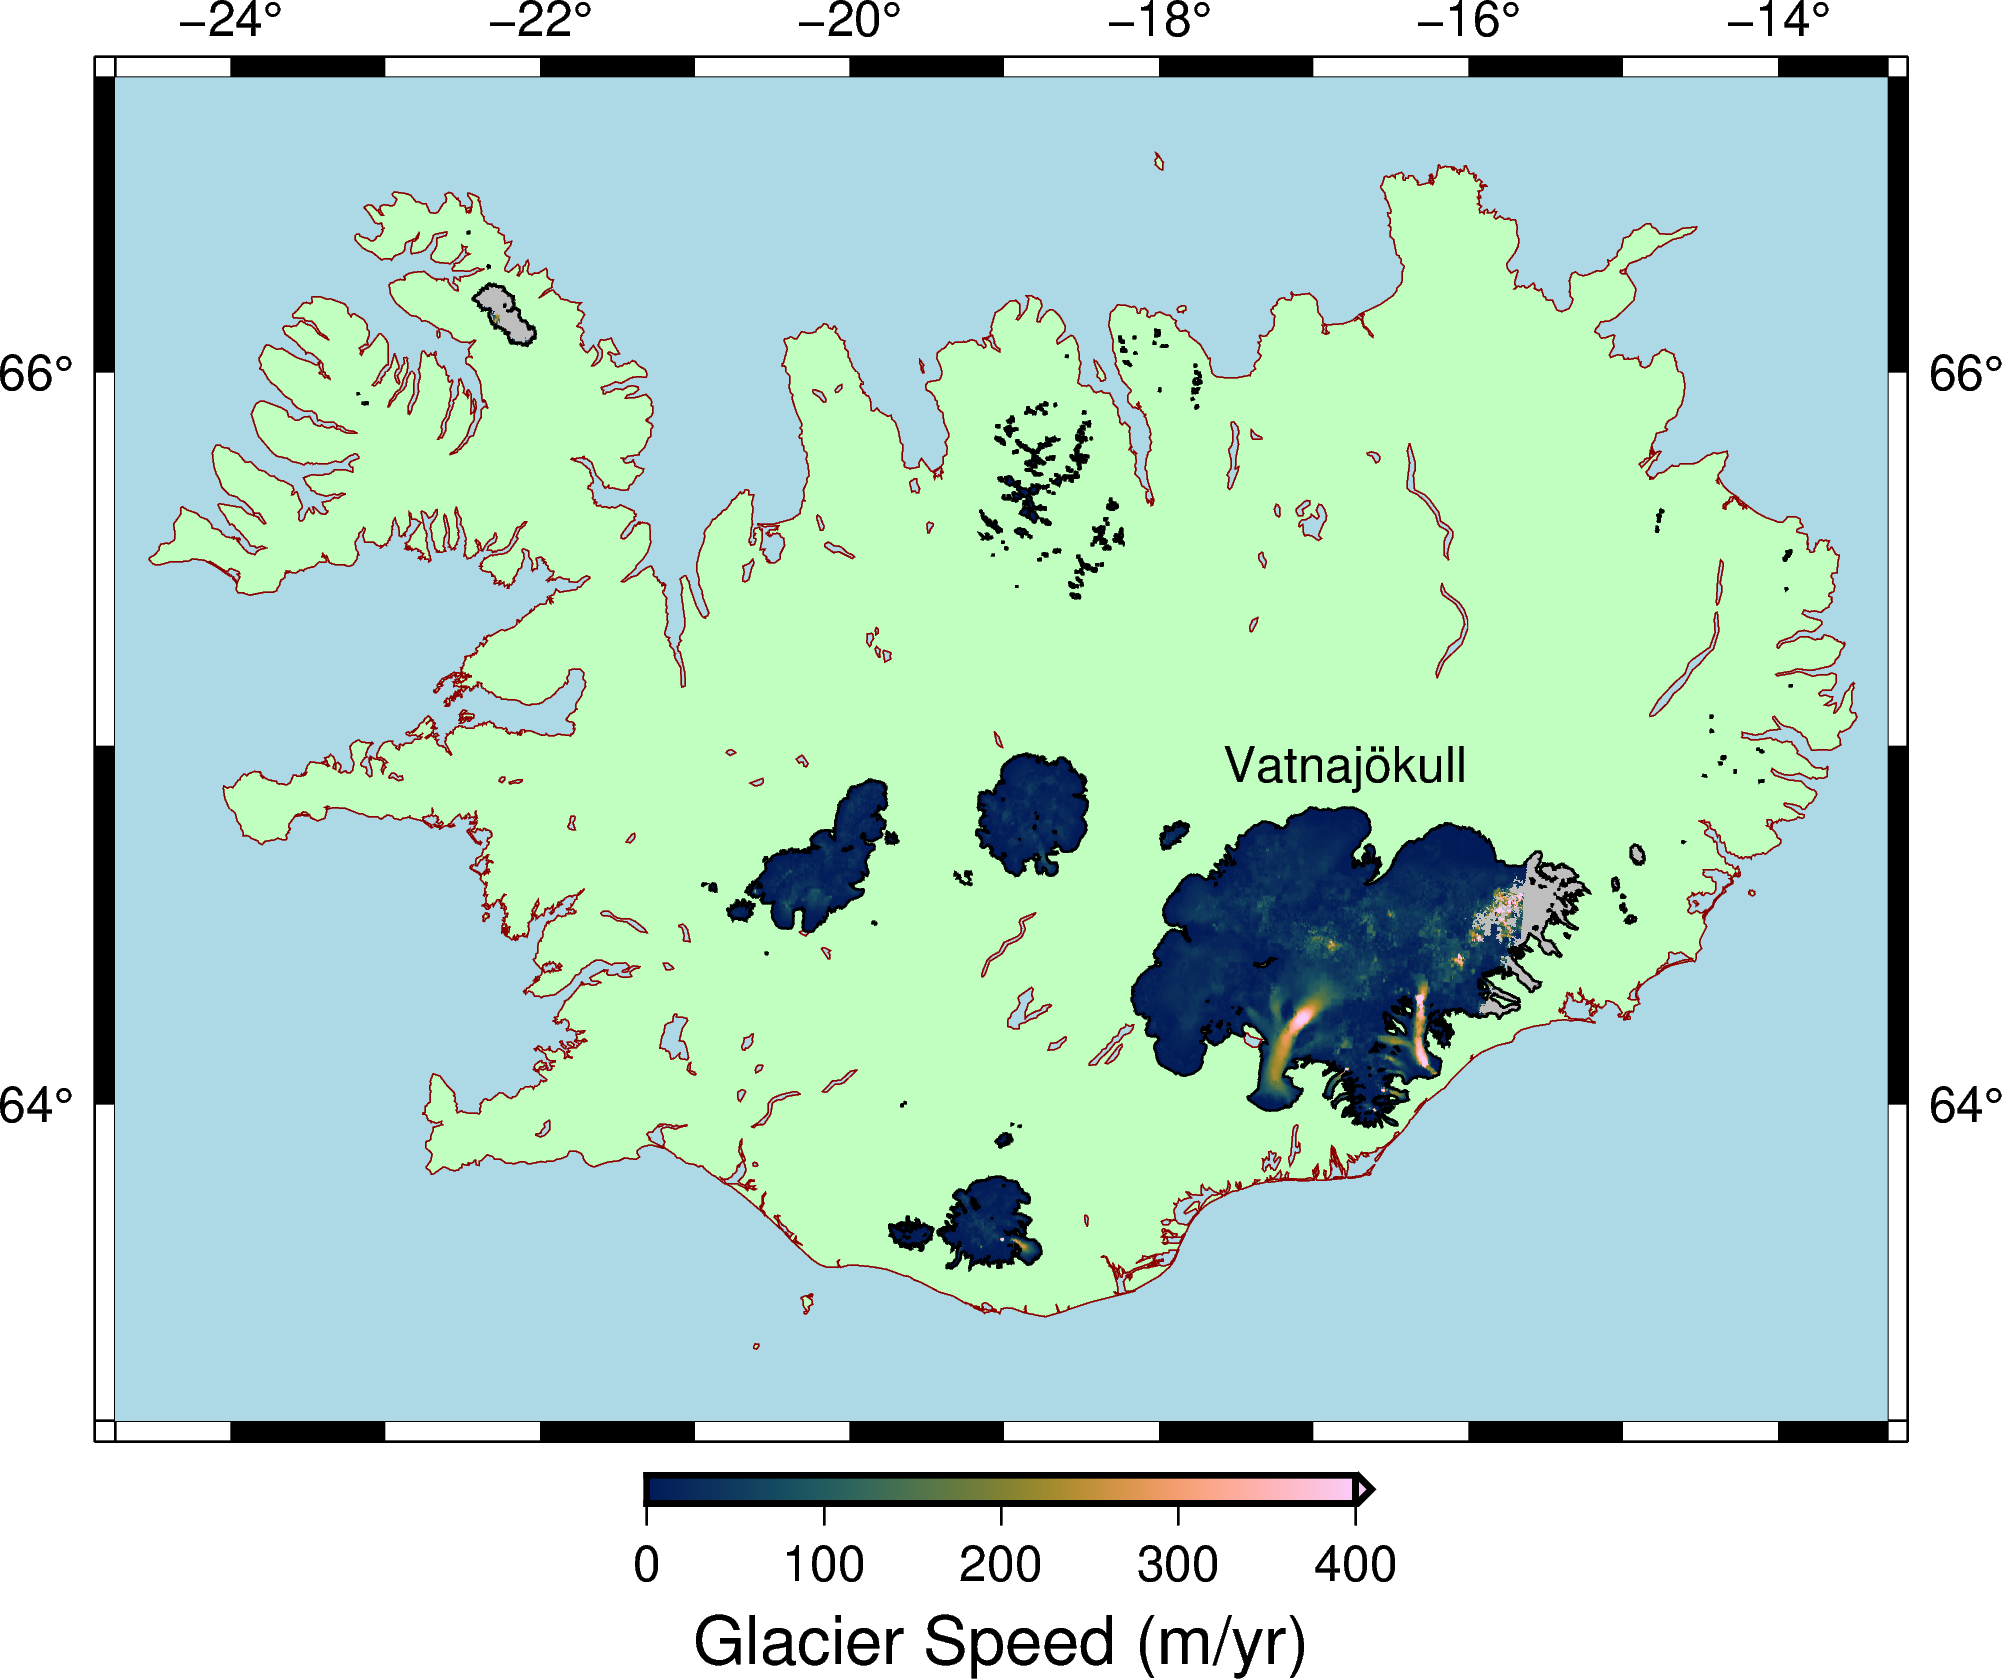

In [3]:
fig = pygmt.Figure()

fig.basemap(region='IS+R0.2', projection='M15c', frame=['af', 'WNEs'])
fig.coast(shorelines='thinnest,darkred', land='darkseagreen1', water='lightblue', area_thresh=1)

# Here's how to locally override PyGMT configurations for the makecpt command:
with pygmt.config(COLOR_NAN='gray'):
    pygmt.makecpt(cmap='batlow', series=[0, 400, 10], background=True, continuous=True, overrule_bg=True)

# With the current PyGMT version, we have to use a low-level approach to access the gmt clip command.
with pygmt.clib.Session() as ses:
    ses.call_module('clip', glacier_outline)
    fig.grdimage(grid=speed_file)
    ses.call_module('clip', '-C')

fig.plot(data=glacier_outline, pen='thinner,black')
fig.colorbar(position='JCB+w6c+ef', frame='x100+l"Glacier Speed (m/yr)"')
fig.text(x=-16.8, y=64.95, text='Vatnajökull', font='12p', justify='CM')

fig.show()

In [4]:
fig.savefig('iceland_glacier_speed_pygmt.png')